# Notebook for making some figures of reinfections, to get an overview before winter 2022/2023

Starting point: "Overview_Late2022.ipynb"

In [156]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
# import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib widget
plt.style.use('RasmusStyle.mplstyle')

from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date

import sys
sys.path.insert(1,'../scripts/') # Add path to scripts, to allow importing PandemiXFunctions
import PandemiXFunctions as pf


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# # Define running mean functions
# def rnMean(data,meanWidth):
#     return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
# def rnTime(t,meanWidth):
#     return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [157]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 
path_figs = path_figs + 'Overblik/'

# Load data

In [158]:
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfCase = pd.read_csv(latestdir+'/Test_pos_over_time.csv',delimiter = ';',dtype=str)
dfCase = dfCase.iloc[:-2]
dfCase['NewPositive'] = pd.to_numeric(dfCase['NewPositive'].astype(str).apply(lambda x: x.replace('.','')))
dfCase['Tested'] = pd.to_numeric(dfCase['Tested'].astype(str).apply(lambda x: x.replace('.','')))
dfCase['PosPct'] = pd.to_numeric(dfCase['PosPct'].astype(str).apply(lambda x: x.replace(',','.')))
dfCase['Date'] =  pd.to_datetime(dfCase.Date,format='%Y-%m-%d')
testDates = dfCase['Date']

dfAdm = pd.read_csv(latestdir+'/Newly_admitted_over_time.csv',delimiter = ';',dtype=str)
dfAdm['Dato'] = pd.to_datetime(dfAdm['Dato'])
dfAdm['Total'] = pd.to_numeric(dfAdm['Total'])
dfAdm.tail()


dfDea = pd.read_csv(latestdir+'/Deaths_over_time.csv',delimiter = ';',dtype=str)
dfDea = dfDea.iloc[:-1,:]
dfDea['Dato'] = pd.to_datetime(dfDea['Dato'])
dfDea['Antal_døde'] = pd.to_numeric(dfDea['Antal_døde'])
dfDea.tail()

dfCase.tail()

,Date,NewPositive,NotPrevPos,PosPct,PrevPos,Tested,Tested_kumulativ
1010,2022-11-02,672,6.464,10.4,98,6562,65.641.352
1011,2022-11-03,608,6.015,10.1,93,6108,65.647.460
1012,2022-11-04,547,4.909,11.1,101,5010,65.652.470
1013,2022-11-05,355,2.923,12.1,67,2990,65.655.460
1014,2022-11-06,422,2.946,14.3,61,3007,65.658.467


In [159]:
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir 

dfReinfFile = pd.read_csv(latestdir+'/Regionalt_DB/24_reinfektioner_daglig_region.csv',encoding='latin1',delimiter = ';')
dfReinfFile['Prøvedato'] = pd.to_datetime(dfReinfFile['Prøvedato'])
# groupdf = df.groupby(['Prøvedato').sum()
# df_reinf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller bekræftet tilfælde)'] == '1.Reinfektion'].groupby('Prøvedato').sum()
# df_inf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller bekræftet tilfælde)'] != '1.Reinfektion'].groupby('Prøvedato').sum()
df_reinf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller første infektion)'] == '1.Reinfektion'].groupby('Prøvedato').sum()
df_inf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller første infektion)'] != '1.Reinfektion'].groupby('Prøvedato').sum()

In [160]:
dfMain = pd.DataFrame(
    {
        'Date' : df_inf.index,
        'Inf' : df_inf.infected,
        'Reinf' : df_reinf.infected,
        'Total' : df_inf.infected + df_reinf.infected,
    }
).reset_index(drop=True)

In [161]:
DKpop = 5800000


In [201]:
# Load blooddonor data (See DataOverview.ipynb)
# dfBlood = pd.read_csv('../Data/DK_BloodDonors.csv')
# dfBlood['date'] = pd.to_datetime(dfBlood['date'])
dfBlood = pd.read_csv(rootdir_data+'bloodData.csv',delimiter=';')
dfBlood['Date'] = pd.to_datetime(dfBlood['Date'])

dfBlood['Total'] = pd.to_numeric(dfBlood['Total']/100)
dfBlood['Lower'] = pd.to_numeric(dfBlood['Lower']/100)
dfBlood['Upper'] = pd.to_numeric(dfBlood['Upper']/100)


In [202]:
dfBloodExpand = dfBlood.copy()
# dfBloodExpand
newRow = dfBloodExpand.iloc[0].copy()
newRow.Date = np.datetime64('2021-11-01')
newRow.Total = 0
newRow.Upper = 0
newRow.Lower = 0
newRow.name = -1
newRow

# dfBloodExpand.append(newRow)
dfBloodExpand = pd.concat((dfBloodExpand,pd.DataFrame(newRow).transpose())).sort_index().reset_index(drop=True)



dfBloodExpand['Total'] = pd.to_numeric(dfBloodExpand['Total'])
dfBloodExpand['Lower'] = pd.to_numeric(dfBloodExpand['Lower'])
dfBloodExpand['Upper'] = pd.to_numeric(dfBloodExpand['Upper'])
dfBloodExpand

,Date,Total,Lower,Upper
0,2021-11-01,0.00,0.00,0.00
1,2022-01-04,0.14,0.12,0.15
2,2022-01-18,0.21,0.19,0.23
3,2022-02-01,0.37,0.34,0.39
4,2022-02-15,0.55,0.52,0.59
5,2022-03-01,0.62,0.59,0.66
6,2022-03-15,0.68,0.64,0.71


# Make some figures

(0.0, 60.141646551724136)

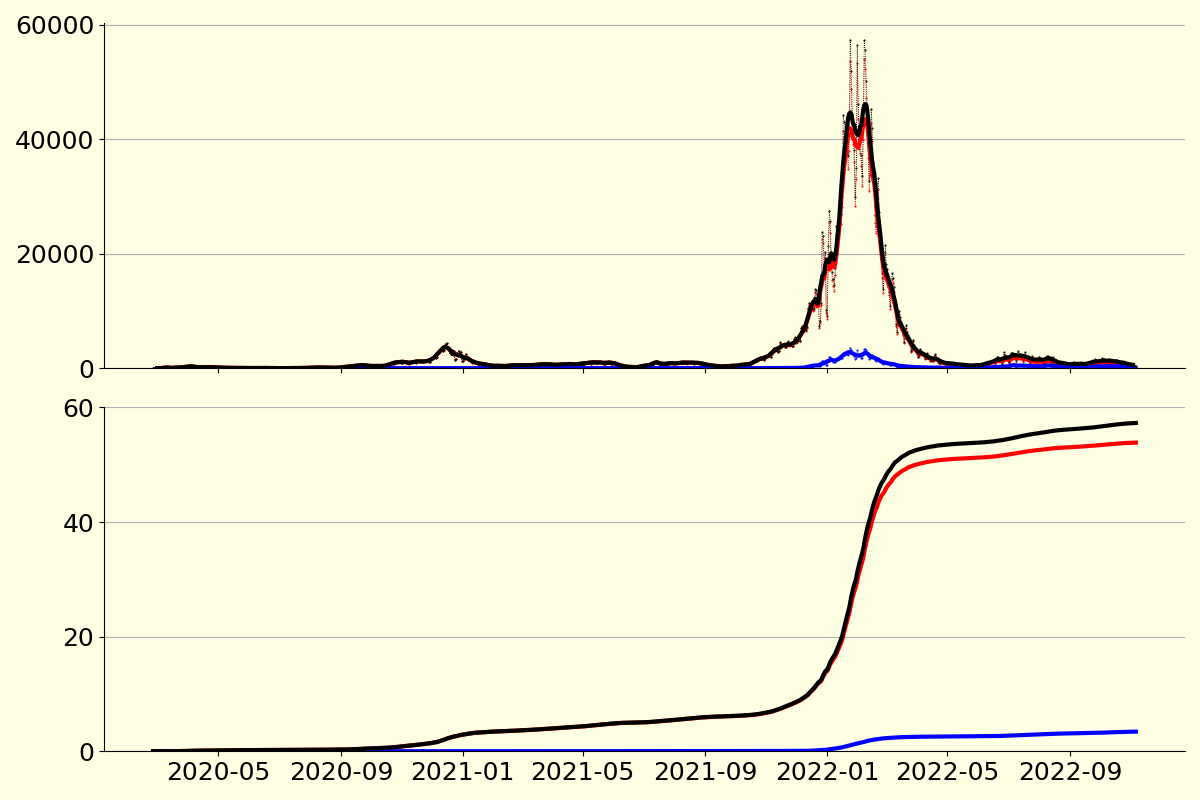

In [162]:
fig,(ax,ax2) = plt.subplots(2,1,sharex=True)

ax.plot(dfMain.Date,dfMain.Inf,'r.:',ms=1,lw=0.6)
ax.plot(dfMain.Date,dfMain.Reinf,'b.:',ms=1,lw=0.6)
ax.plot(dfMain.Date,dfMain.Total,'k.:',ms=1,lw=0.6)
ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Inf),'r')
ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Reinf),'b')
ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Total),'k')


ax2.plot(dfMain.Date,100*np.cumsum(dfMain.Inf)/DKpop,'r')
ax2.plot(dfMain.Date,100*np.cumsum(dfMain.Reinf)/DKpop,'b')
ax2.plot(dfMain.Date,100*np.cumsum(dfMain.Total)/DKpop,'k')


ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

(19147.0, 19299.0)

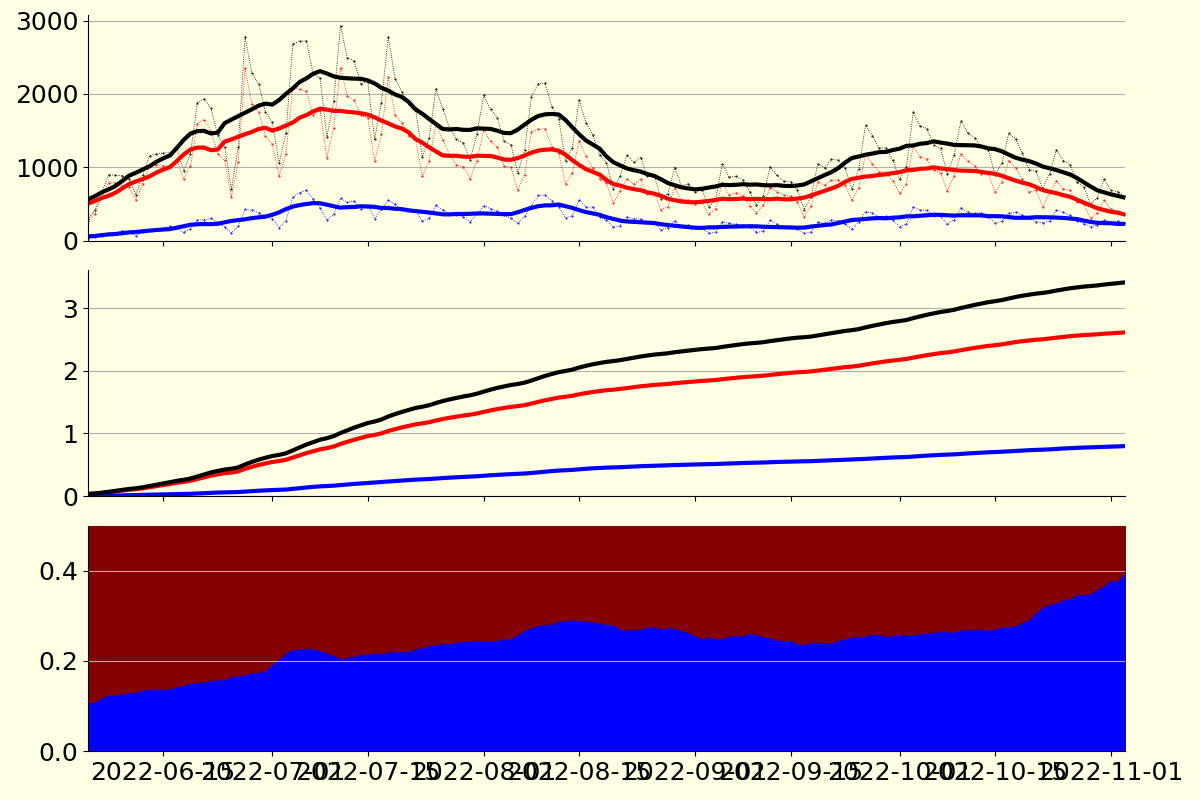

In [163]:
dfShort = dfMain[dfMain.Date >= np.datetime64('2022-06-01')]

fig,(ax,ax2,ax3) = plt.subplots(3,1,sharex=True)

ax.plot(dfShort.Date,dfShort.Inf,'r.:',ms=1,lw=0.6)
ax.plot(dfShort.Date,dfShort.Reinf,'b.:',ms=1,lw=0.6)
ax.plot(dfShort.Date,dfShort.Total,'k.:',ms=1,lw=0.6)
ax.plot(pf.rnTime(dfShort.Date),pf.rnMean(dfShort.Inf),'r')
ax.plot(pf.rnTime(dfShort.Date),pf.rnMean(dfShort.Reinf),'b')
ax.plot(pf.rnTime(dfShort.Date),pf.rnMean(dfShort.Total),'k')


ax2.plot(dfShort.Date,100*np.cumsum(dfShort.Inf)/DKpop,'r')
ax2.plot(dfShort.Date,100*np.cumsum(dfShort.Reinf)/DKpop,'b')
ax2.plot(dfShort.Date,100*np.cumsum(dfShort.Total)/DKpop,'k')

# ax3.plot(dfShort.Date,dfShort.Reinf/dfShort.Total,'b')
ax3.fill_between(pf.rnTime(dfShort.Date),pf.rnMean(dfShort.Total)/pf.rnMean(dfShort.Total),color='xkcd:dark red')
ax3.fill_between(pf.rnTime(dfShort.Date),pf.rnMean(dfShort.Reinf)/pf.rnMean(dfShort.Total),color='b')


ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

ax3.set_ylim(bottom=0,top=0.5)

ax.set_xlim([dfShort.Date.values[3],dfShort.Date.values[-4]])

In [164]:
dfMain['InfCumu'] = np.cumsum(dfMain.Inf)
dfMain['ReinfCumu'] = np.cumsum(dfMain.Reinf)
dfMain['TotalCumu'] = np.cumsum(dfMain.Total)

In [165]:
# dfMain.loc[dfMain.Date == startDate, 'Inf'].values

In [199]:
# dfMain.loc[dfMain.Date == startDate]


In [221]:
startDate = dfBloodExpand.Date.values[-1]

startPosPop = dfMain.loc[dfMain.Date == startDate, 'InfCumu'].values[0]
startNegPop = DKpop  - startPosPop

startPos = startPosPop/DKpop
startNeg = startNegPop/DKpop
startInf = dfBloodExpand.Total.values[-1]

print(startPos)
print(startNeg)
print(startInf)

startUndetect = (startInf-startPos)
print(startUndetect)
startFracUnd = startUndetect/startNeg 
print(startFracUnd)

# curInf = dfMain['InfCumu'] - dfMain.loc[dfMain.Date == startDate, 'InfCumu'].values
# curReinf = dfMain['ReinfCumu'] - dfMain.loc[dfMain.Date == startDate, 'ReinfCumu'].values
# curTotal = dfMain['TotalCumu'] - dfMain.loc[dfMain.Date == startDate, 'TotalCumu'].values

0.48673827586206897
0.513261724137931
0.68
0.19326172413793108
0.3765364044290102


(-1.0, 1.0)

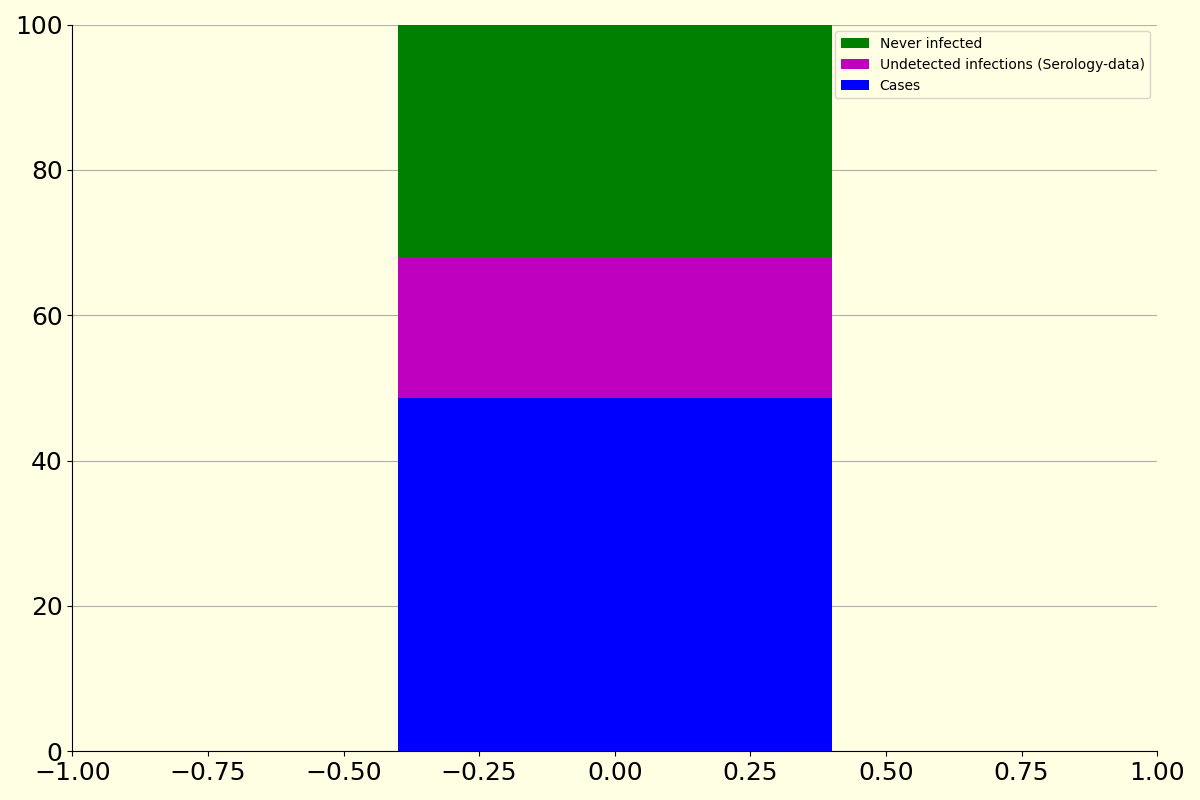

In [228]:
fig,ax = plt.subplots()

ax.bar(0,100,color='g',label='Never infected')
ax.bar(0,(100 * startPos) + 100*startUndetect,color='m',label='Undetected infections (Serology-data)')
ax.bar(0,100 * startPos,color='b',label='Cases')

ax.legend()

ax.set_ylim([0,100])

# ax.grid(False)
ax.set_axisbelow(True)

ax.set_xlim([-1,1])

In [235]:
# startDate = np.datetime64('2022-03-01')

curInf = dfMain['InfCumu'] - dfMain.loc[dfMain.Date == startDate, 'InfCumu'].values
curReinf = dfMain['ReinfCumu'] - dfMain.loc[dfMain.Date == startDate, 'ReinfCumu'].values
curTotal = dfMain['TotalCumu'] - dfMain.loc[dfMain.Date == startDate, 'TotalCumu'].values



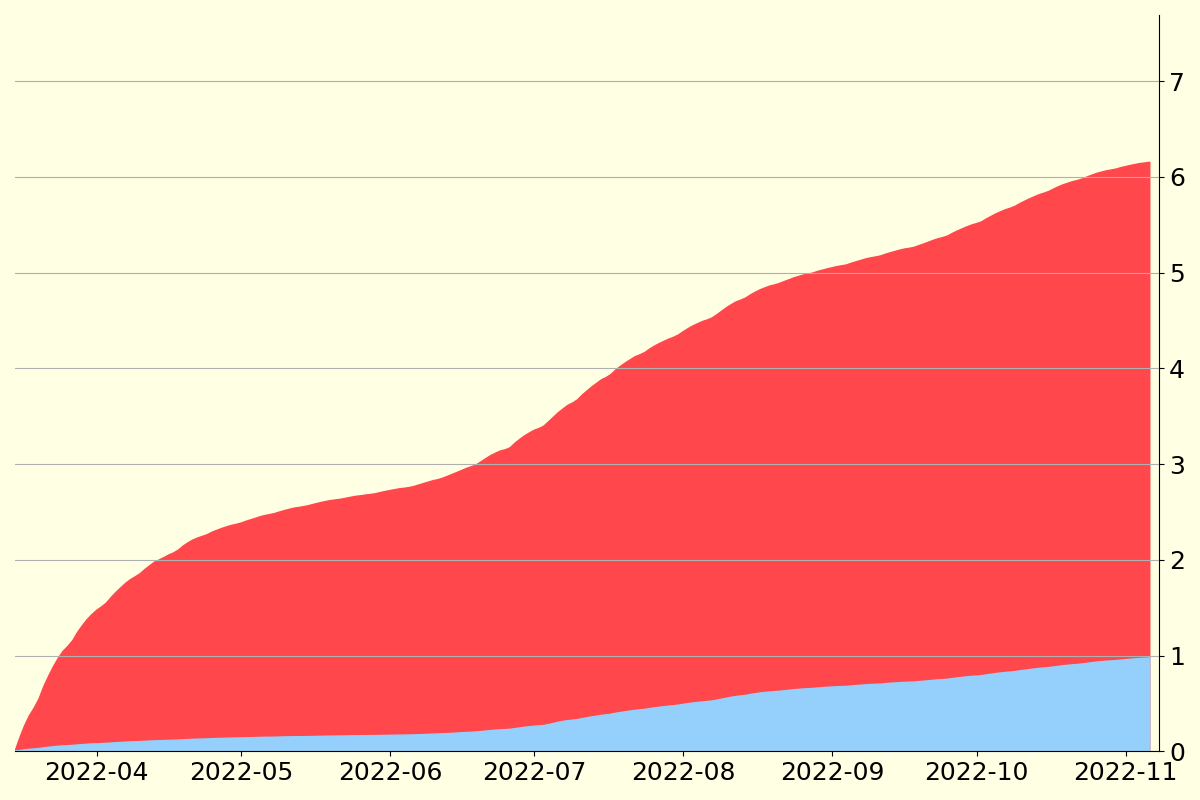

In [232]:

fig,ax = plt.subplots()

clrNew = 'xkcd:light red'
clrReinfNew = 'xkcd:dark red'
clrReinfOff = 'xkcd:light blue'

ax.fill_between(dfMain.Date,100*curTotal/(DKpop),color=clrNew)
ax.fill_between(dfMain.Date,100*curReinf/(DKpop),color=clrReinfOff)
# ax.plot(dfMain.Date,100*curInf/(DKpop),'b')
# ax.plot(dfMain.Date,100*curReinf/(DKpop),'r')
# ax.plot(dfMain.Date,100*curTotal/(DKpop),'k')

ax.set_ylim(bottom=0)
ax.set_ylim(top= 1.25 * 100*np.max(curTotal)/DKpop)

ax.set_xlim(left=startDate)
ax.set_xlim(right=np.datetime64('today'))
ax.yaxis.tick_right()

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(True)

In [236]:

newReinf = startFracUnd * curInf 
# newReinf = fracSus * curInf 
totReinf = curReinf + newReinf
actualNew = curTotal - totReinf

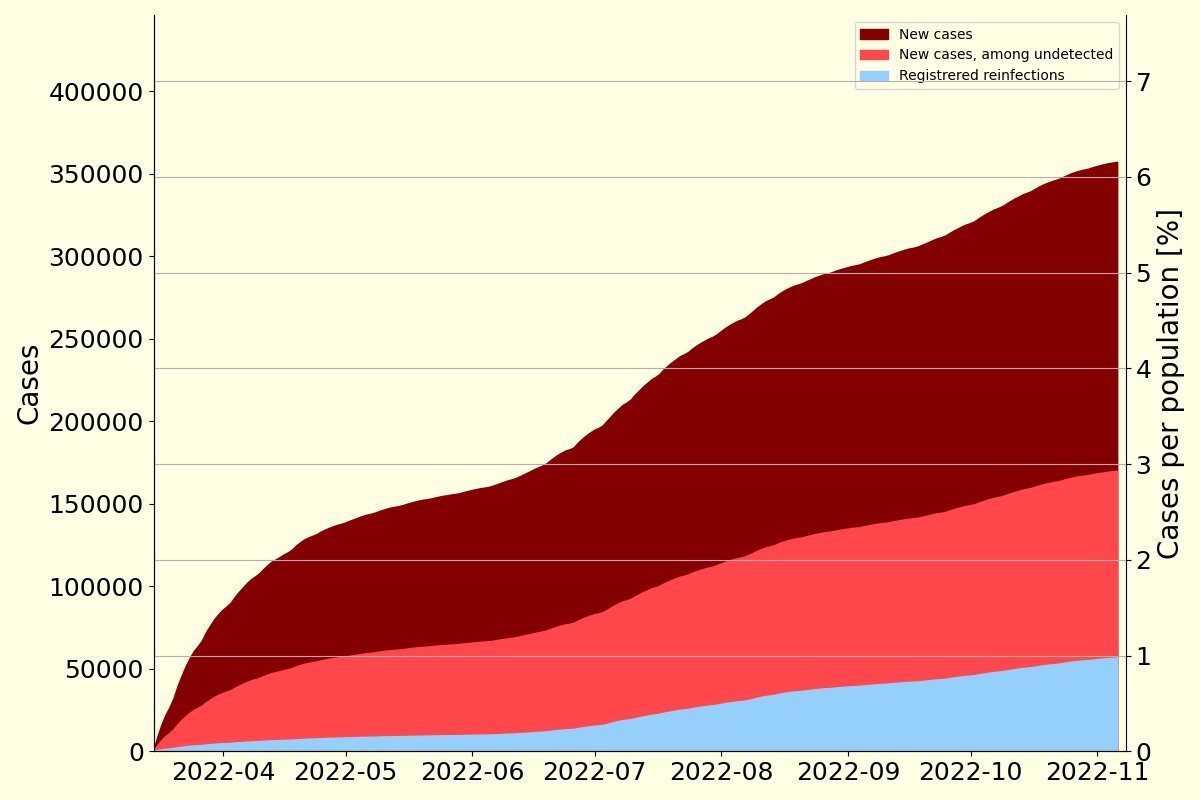

In [264]:

fig,ax = plt.subplots()

clrNew = 'xkcd:dark red'
clrReinfNew = 'xkcd:light red'
clrReinfOff = 'xkcd:light blue'

ax.fill_between(dfMain.Date,curReinf+curInf,color=clrNew,label='New cases')
ax.fill_between(dfMain.Date,curReinf+newReinf,color=clrReinfNew,label='New cases, among undetected')
ax.fill_between(dfMain.Date,curReinf,color=clrReinfOff,label='Registrered reinfections')
# ax.plot(dfMain.Date,100*curInf/(DKpop),'b')
# ax.plot(dfMain.Date,100*curReinf/(DKpop),'r')
# ax.plot(dfMain.Date,100*curTotal/(DKpop),'k')

ax.set_ylim(bottom=0)
ax.set_ylim(top= 1.25 * np.max(curTotal))

ax.set_xlim(left=startDate)
ax.set_xlim(right=np.datetime64('today'))

ax_2 = ax.twinx()
ax_2.set_ylim(bottom=0)
ax_2.set_ylim(top=100*ax.get_ylim()[1]/DKpop)

ax.grid(False)
# ax.set_axisbelow(True)
# ax_2.set_axisbelow(True)

# ax.yaxis.tick_right()

# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(True)

ax.legend()

ax.set_ylabel('Cases')
ax_2.set_ylabel('Cases per population [%]')

if saveFigures:
    fig.savefig(path_figs+'../Reinfections/Reinfections2022_SplitByRegistration')

In [305]:
# dailyReInfOff/dailyTot

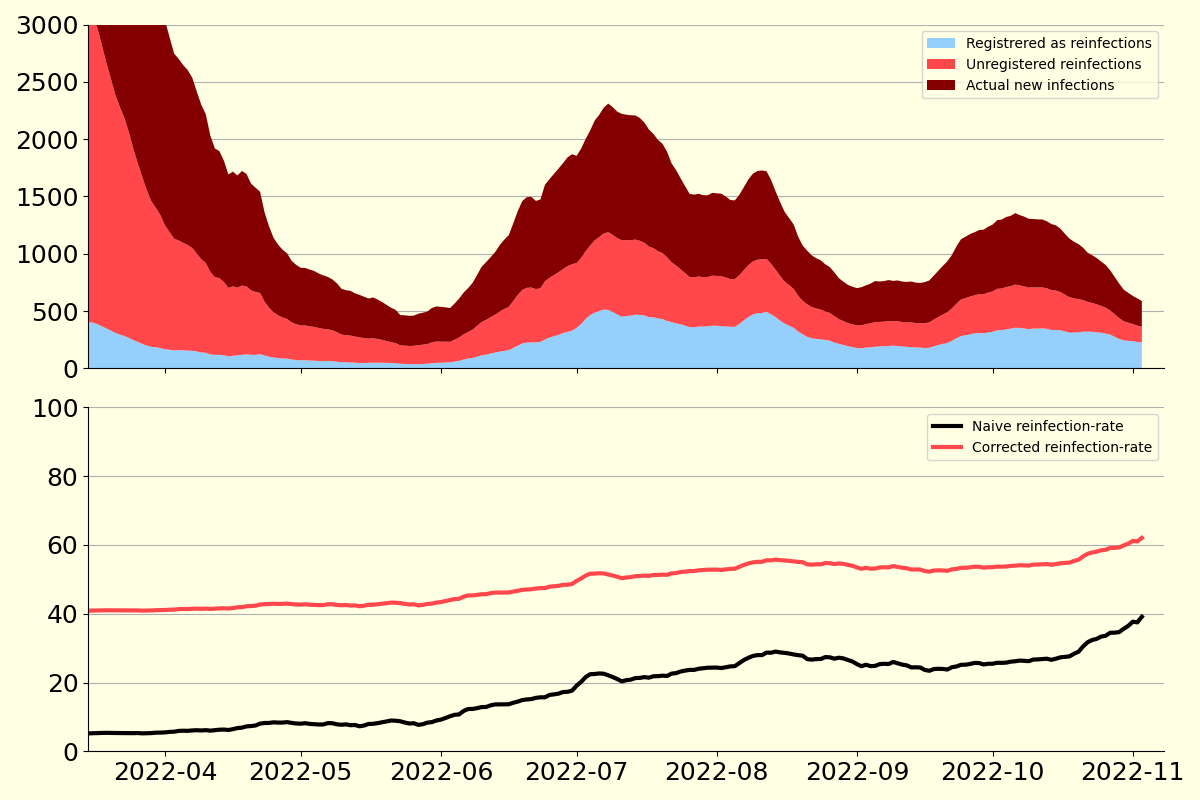

In [313]:
fig,(ax,ax2) = plt.subplots(2,1,sharex=True)

# ax.fill_between(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Reinf),color=clrReinfOff,label='Registrered as reinfections')
# ax.fill_between(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Inf * startFracUnd),pf.rnMean(dfMain.Reinf),color=clrReinfNew,label='Unregistrered reinfections')
# ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Inf))

ax.stackplot(pf.rnTime(dfMain.Date),
    pf.rnMean(dfMain.Reinf),
    pf.rnMean(dfMain.Inf * startFracUnd),
    pf.rnMean(dfMain.Inf * (1-startFracUnd)),
    colors=[clrReinfOff,clrReinfNew,clrNew],
    labels=[
        'Registrered as reinfections',
        'Unregistered reinfections',
        'Actual new infections'
    ]
)

# ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Total),'k:',label='Total infections')

ax.legend()

ax.set_ylim([0,3000])
ax.set_xlim(left=startDate)
ax.set_xlim(right=np.datetime64('today'))


dailyReInfOff = pf.rnMean(dfMain.Reinf)
dailyReInfNew = pf.rnMean(dfMain.Inf * startFracUnd)
dailyNew = pf.rnMean(dfMain.Inf * (1-startFracUnd))

dailyTot = pf.rnMean(dfMain.Total)

ax2.plot(pf.rnTime(dfMain.Date),100*dailyReInfOff/dailyTot,color='k',label='Naive reinfection-rate')
ax2.plot(pf.rnTime(dfMain.Date),100*(dailyReInfNew+dailyReInfOff)/dailyTot,color=clrReinfNew,label='Corrected reinfection-rate')

ax2.legend()

ax2.set_ylim(bottom=0)
ax2.set_ylim(top=100)

ax.set_axisbelow(True)

fig.tight_layout()


if saveFigures:
    fig.savefig(path_figs+'../Reinfections/Reinfections2022_SplitByRegistrationDailyWithRate')

(19066.0, 19347.85)

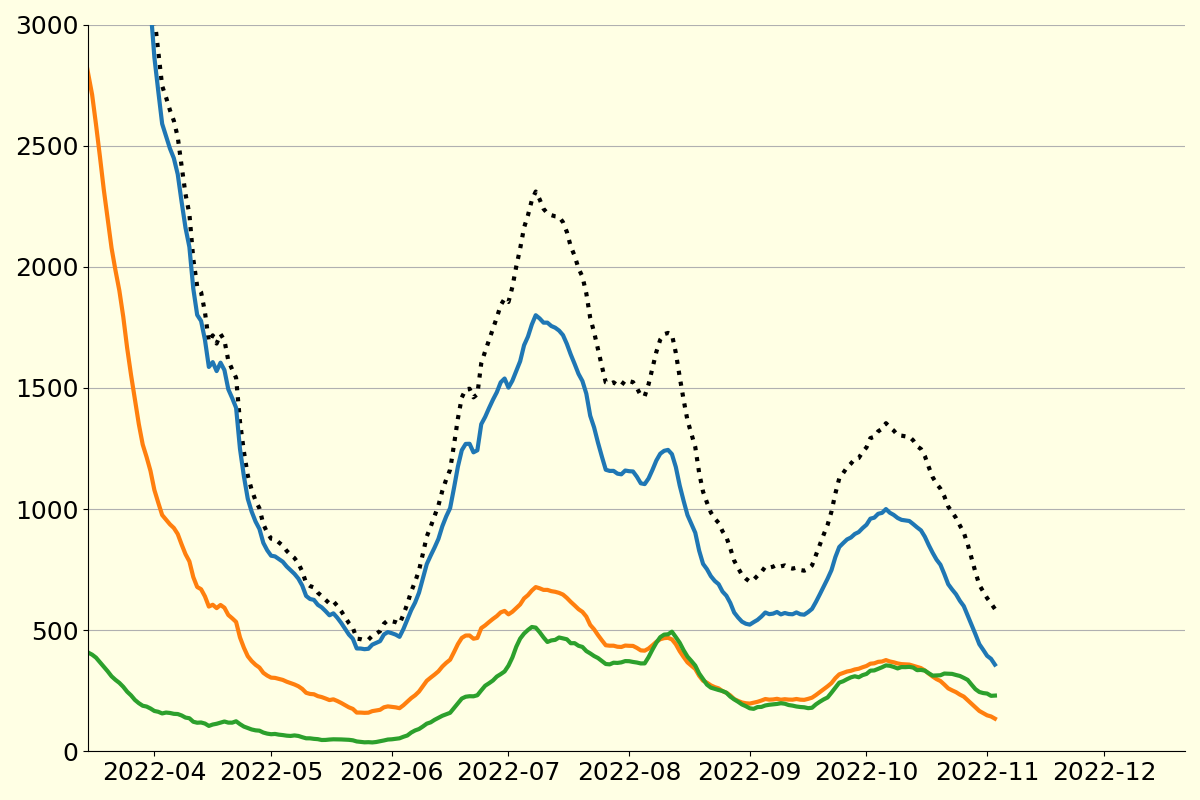

In [281]:
fig,ax = plt.subplots()

ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Total),'k:')
ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Inf))
ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Inf * startFracUnd))
ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Reinf))

ax.set_ylim([0,3000])
ax.set_xlim(left=startDate)

(19066.0, 19304.0)

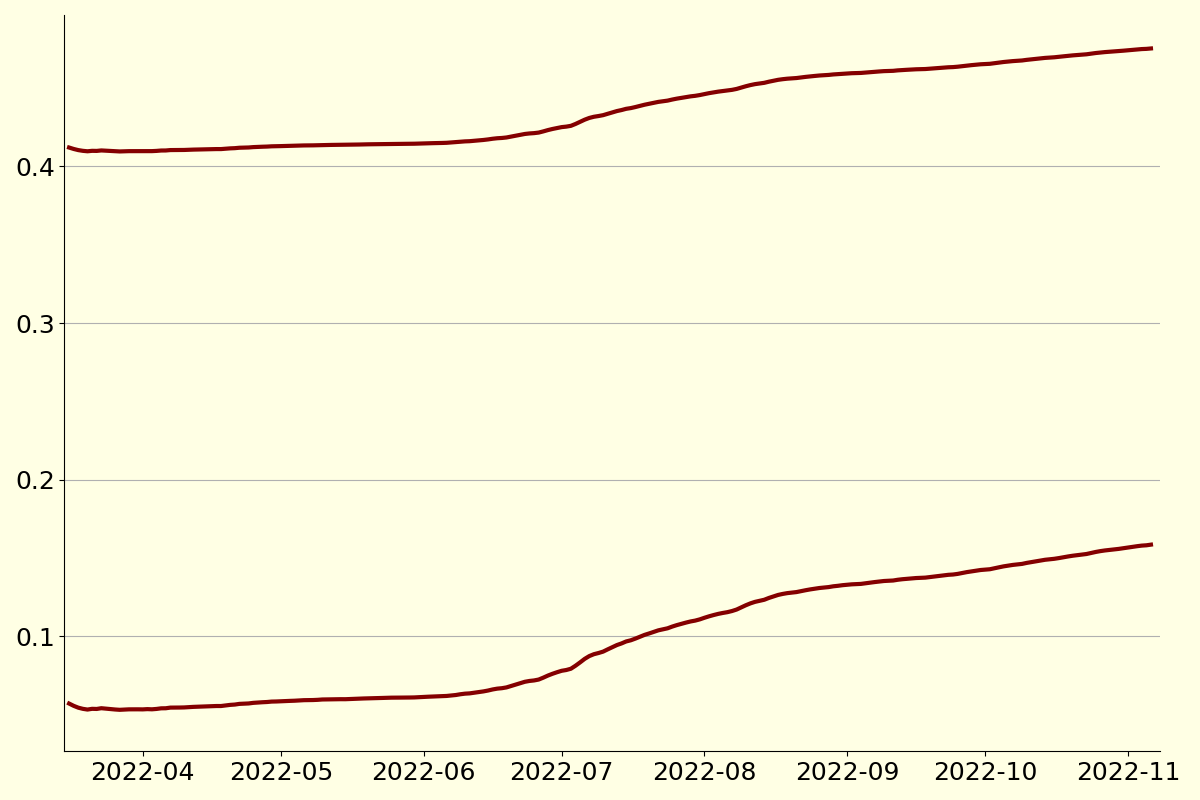

In [274]:

fig,ax = plt.subplots()

reInfFrac = totReinf/curTotal
reInfFracNaive = curReinf/curTotal
ax.plot(dfMain.Date,reInfFrac,color=clrNew,label='New cases')
ax.plot(dfMain.Date,reInfFracNaive,color=clrNew,label='New cases')


# ax.set_ylim(bottom=0)
# ax.set_ylim(top= 1.25 * np.max(curTotal))

ax.set_xlim(left=startDate)
ax.set_xlim(right=np.datetime64('today'))

In [245]:
ax.get_ylim()[0]

0.0

In [237]:
# # startDate = np.datetime64('2022-04-01')

# # curInf = dfMain['InfCumu'] - dfMain.loc[dfMain.Date == startDate, 'InfCumu'].values
# # curReinf = dfMain['ReinfCumu'] - dfMain.loc[dfMain.Date == startDate, 'ReinfCumu'].values
# # curTotal = dfMain['TotalCumu'] - dfMain.loc[dfMain.Date == startDate, 'TotalCumu'].values


# startTotal = dfMain[dfMain.Date == startDate].TotalCumu.values[0]/DKpop

# bloodEsti = 0.7 
# bloodEsti/startTotal  

# negPop = 1 - startTotal 



# susPop = bloodEsti - startTotal   
# undPop = negPop - susPop 

# # undPop + susPop  + startTotal

# fracUnd = undPop/negPop 
# fracSus = susPop/negPop
# fracUnd 

In [238]:
# # detected reinfections: curReInf
# # fraction of "new cases" that are actually reinfections: fracUnd = undPop/negPop
# # number of "new cases" that are actually reinfections: fracUnd * curInf 
# # Total number of reinfections: curReInf + (fracUnd * curInf)

# newReinf = fracUnd * curInf 
# # newReinf = fracSus * curInf 
# totReinf = curReinf + newReinf
# actualNew = curTotal - totReinf

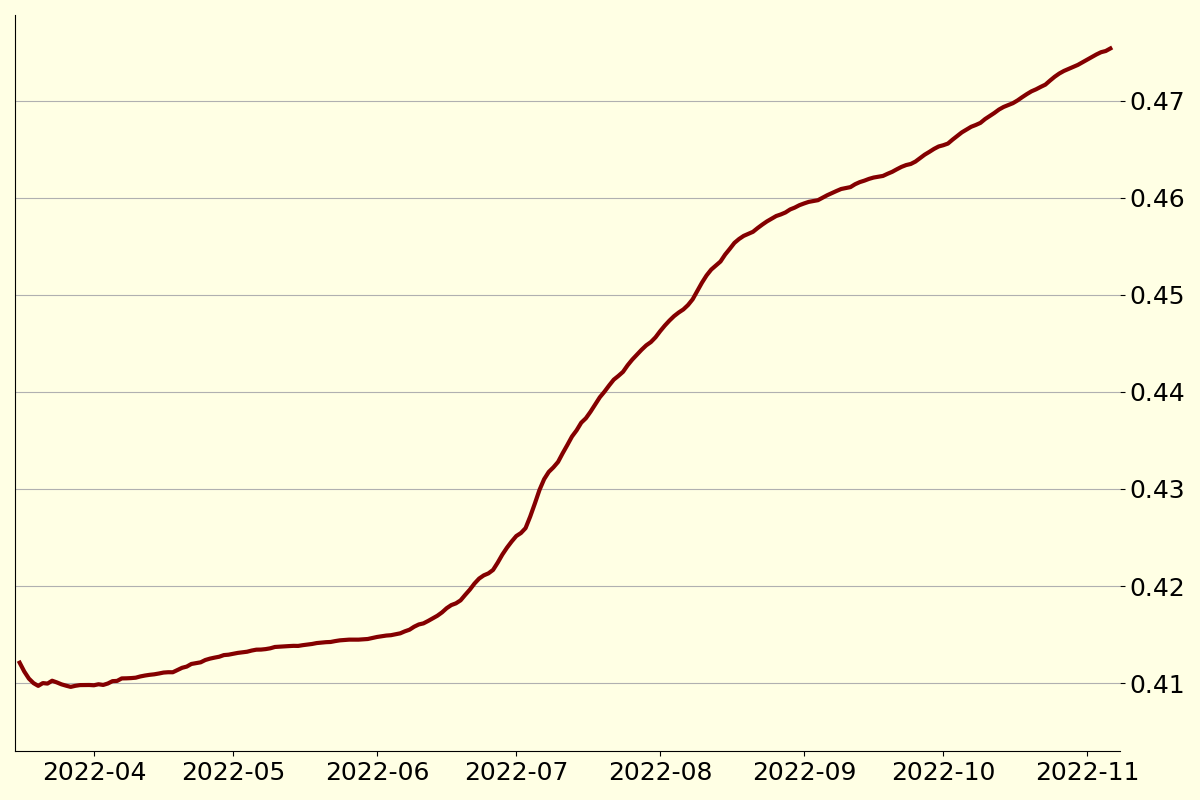

In [239]:

fig,ax = plt.subplots()

# ax.plot(dfMain.Date,actualNew/curTotal,color='r')
ax.plot(dfMain.Date,totReinf/curTotal,color='xkcd:dark red')
# ax.plot(dfMain.Date,curTotal,color='m')

ax.set_xlim(left=startDate)
ax.set_xlim(right=np.datetime64('today'))
ax.yaxis.tick_right()

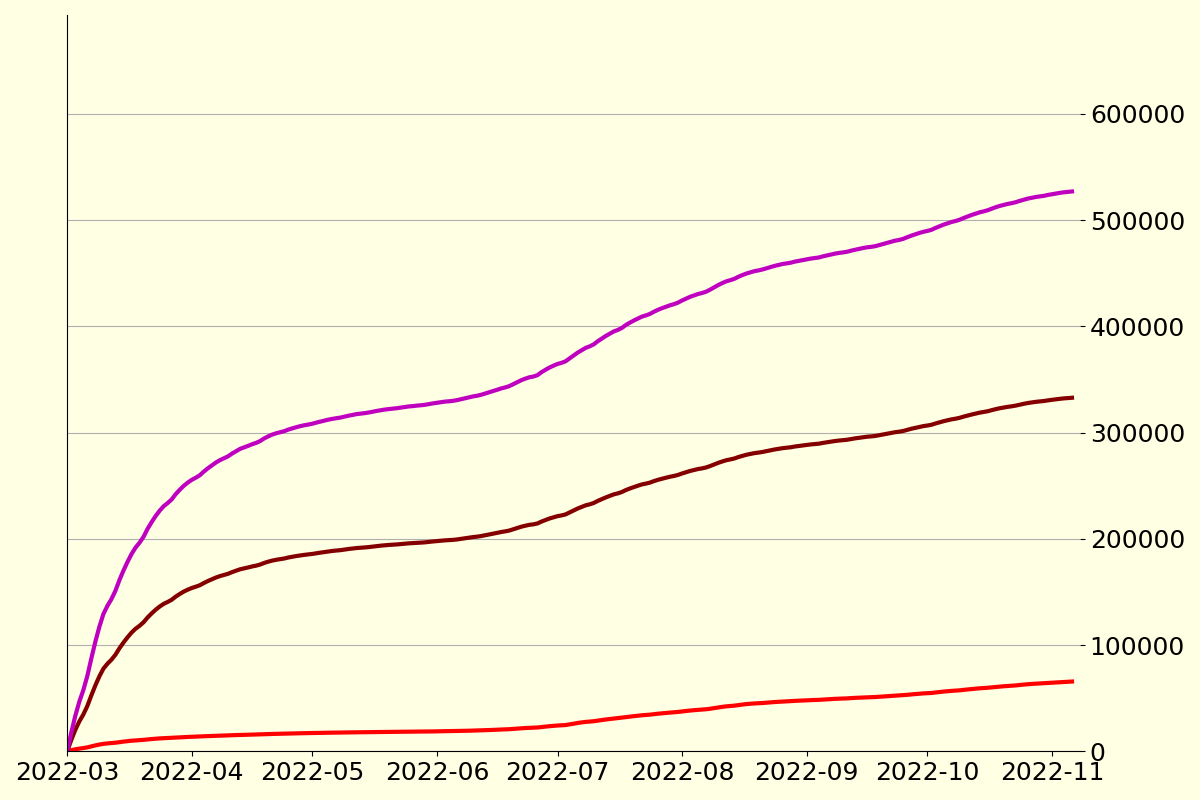

In [172]:

fig,ax = plt.subplots()

ax.plot(dfMain.Date,curReinf,color='r')
ax.plot(dfMain.Date,totReinf,color='xkcd:dark red')
ax.plot(dfMain.Date,curTotal,color='m')
# ax.plot(dfMain.Date,actualNew+totReinf,color='b')

# ax.plot(dfMain.Date,100*curInf/(DKpop),'b')
# ax.plot(dfMain.Date,fracUnd*100*curInf/(DKpop),'b')
# ax.plot(dfMain.Date,100*curReinf/(DKpop),'r')
# ax.plot(dfMain.Date,100*curTotal/(DKpop),'k')

ax.set_ylim(bottom=0)
# ax.set_ylim(top= 1.25 * 100*np.max(curTotal)/DKpop)

ax.set_xlim(left=startDate)
ax.set_xlim(right=np.datetime64('today'))
ax.yaxis.tick_right()

# ax.spines['left'].set_visible(False)
# ax.spines['right'].set_visible(True)

,Date,Total,Lower,Upper
0,2021-11-01,0.00,0.00,0.00
1,2022-01-04,0.14,0.12,0.15
2,2022-01-18,0.21,0.19,0.23
3,2022-02-01,0.37,0.34,0.39
4,2022-02-15,0.55,0.52,0.59
5,2022-03-01,0.62,0.59,0.66
6,2022-03-15,0.68,0.64,0.71


(18901.0, 19351.2)

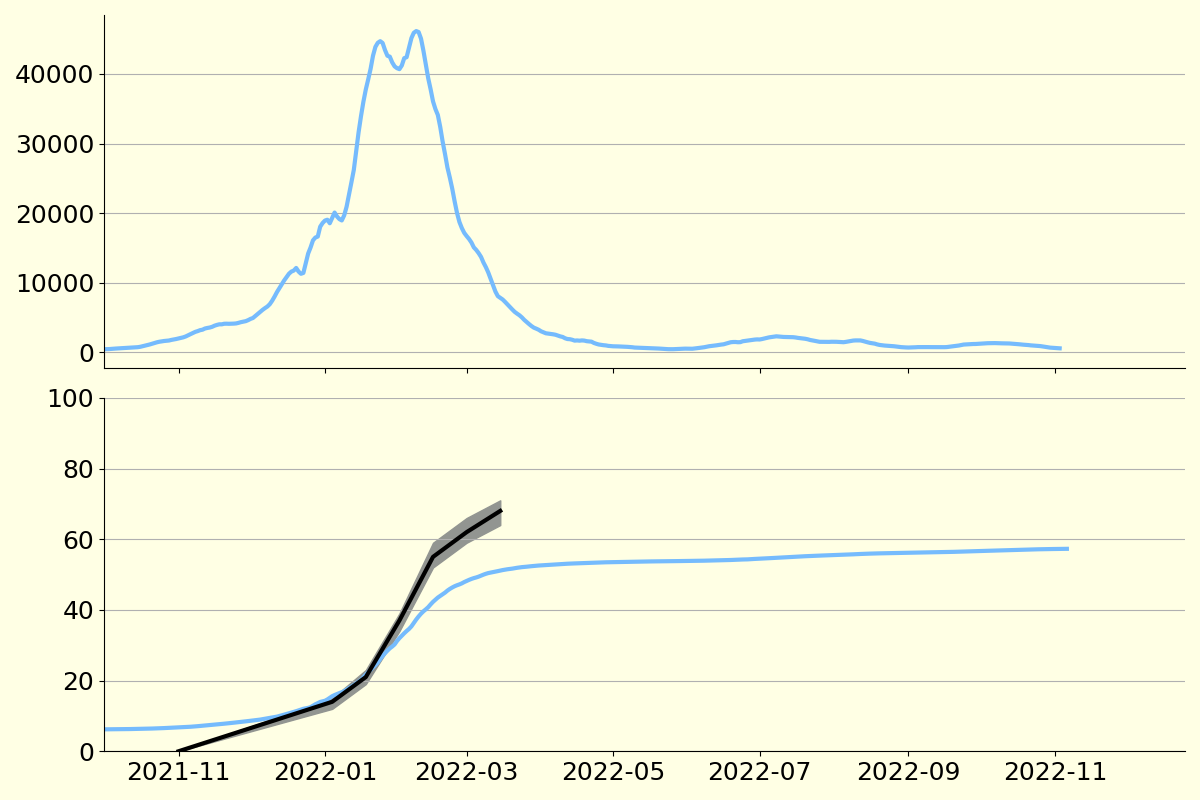

In [198]:
fig,(ax,ax2) = plt.subplots(2,1,sharex=True)

ax.plot(pf.rnTime(dfMain.Date),pf.rnMean(dfMain.Total),color='xkcd:sky blue')

ax2.plot(dfMain.Date,100*np.cumsum(dfMain.Total)/DKpop,color='xkcd:sky blue')
ax2.fill_between(dfBloodExpand.Date,100*dfBloodExpand.Lower,100*dfBloodExpand.Upper,color='xkcd:gray')
ax2.plot(dfBloodExpand.Date,100*dfBloodExpand.Total,'k')

ax2.set_ylim([0,100])

ax2.set_xlim(left=np.datetime64('2021-10-01'))